In [1]:
options(jupyter.plot_mimetypes ='image/png')

# Step1

In [2]:
setwd("~/Autumn2016/Week5/data_wk_5")

In [3]:
load("estrogen_data.RDA")
ls()
library(affy)

[1] "affybatch.estrogen"

Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, as.vector, cbind, colnames,
    do.call, duplicated, eval, evalq, Filter, Find, get, grep, grepl,
    intersect, is.unsorted, lapply, lengths, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unlist, unsplit

Loading required package: Biobase
Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To c

In [4]:
show(affybatch.estrogen)

Warning message:
“replacing previous import ‘AnnotationDbi::tail’ by ‘utils::tail’ when loading ‘hgu95av2cdf’”Warning message:
“replacing previous import ‘AnnotationDbi::head’ by ‘utils::head’ when loading ‘hgu95av2cdf’”


AffyBatch object
size of arrays=640x640 features (19 kb)
cdf=HG_U95Av2 (12625 affyids)
number of samples=8
number of genes=12625
annotation=hgu95av2
notes=


# Step 2

In [5]:
pData(affybatch.estrogen)

estrogen time.h
low10-1.cel  absent   10    
low10-2.cel  absent   10    
high10-1.cel present  10    
high10-2.cel present  10    
low48-1.cel  absent   48    
low48-2.cel  absent   48    
high48-1.cel present  48    
high48-2.cel present  48

# Step3

In [6]:
eset_rma<-rma(affybatch.estrogen)


Background correcting
Normalizing
Calculating Expression


In [7]:
e_rma<-exprs(eset_rma)
head(e_rma)

low10-1.cel low10-2.cel high10-1.cel high10-2.cel low48-1.cel
100_g_at   9.642896    9.741496    9.537036    9.353625      9.591697  
1000_at   10.398169   10.254362   10.003971    9.903528     10.374866  
1001_at    5.717613    5.881008    5.859563    5.954028      5.960540  
1002_f_at  5.512596    5.801807    5.571065    5.608132      5.390064  
1003_s_at  7.783927    8.007975    8.037999    7.835120      7.926487  
1004_at    7.289162    7.603670    7.488539    7.771506      7.521789  
          low48-2.cel high48-1.cel high48-2.cel
100_g_at   9.570590    9.475796    9.530655    
1000_at   10.033520   10.345066    9.863321    
1001_at    6.020889    5.981080    6.285192    
1002_f_at  5.494511    5.508104    5.630107    
1003_s_at  8.138870    7.994937    8.233338    
1004_at    7.599544    7.456149    7.675171

In [8]:
eset_mas5<-mas5(affybatch.estrogen)

background correction: mas 
PM/MM correction : mas 
expression values: mas 
background correcting...done.
12625 ids to be processed
|                    |
|####################|


In [9]:
e_mas5<-exprs(eset_mas5)
head(e_mas5)

low10-1.cel low10-2.cel high10-1.cel high10-2.cel low48-1.cel
100_g_at   884.18520  1211.84521   712.53177    646.76515    725.14456 
1000_at   3187.34592  2724.56783  2072.19271   2120.80292   2425.63906 
1001_at     39.70776    18.18771    15.89701     53.29840    155.93732 
1002_f_at   22.05818    39.21241    13.83366     20.47484     31.06428 
1003_s_at   57.99479    60.84516   185.60032    193.82416     47.55877 
1004_at    152.57803   163.54487   169.85078    161.24416    252.40076 
          low48-2.cel high48-1.cel high48-2.cel
100_g_at  1098.11167   893.67458    963.30543  
1000_at   2422.96908  2302.18511   2398.95741  
1001_at    105.17213    22.50213    132.87479  
1002_f_at   41.11254    32.83082     90.04274  
1003_s_at  290.02262   160.40236    274.03754  
1004_at    153.05379   195.75015    258.54392

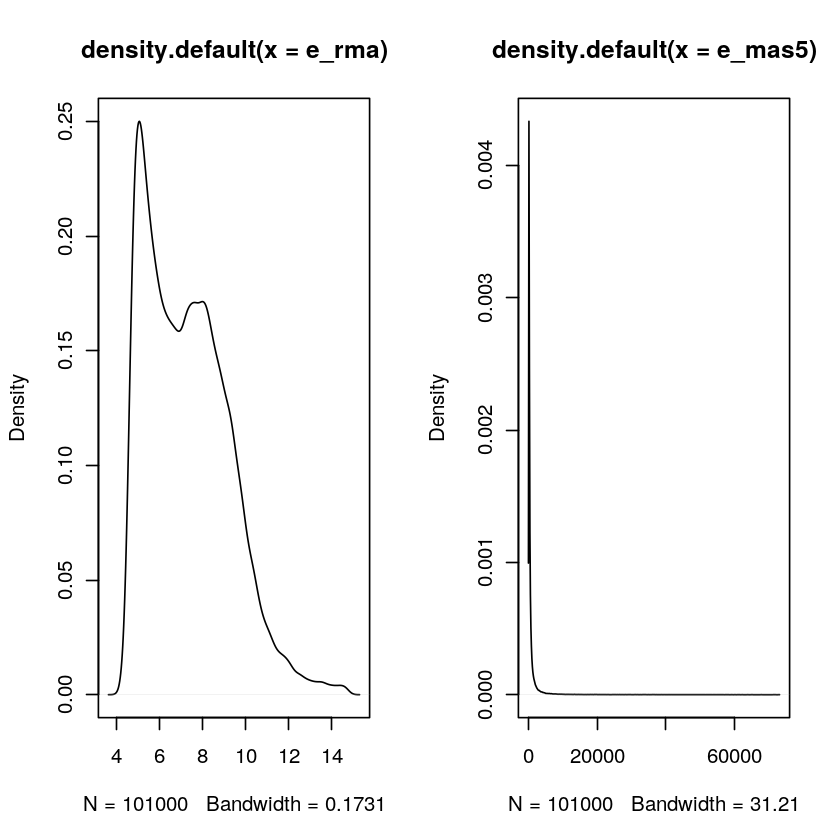

In [10]:
par(mfrow=c(1,2))
d1<-density(e_rma)
plot(d1)
d2<-density(e_mas5)
plot(d2)

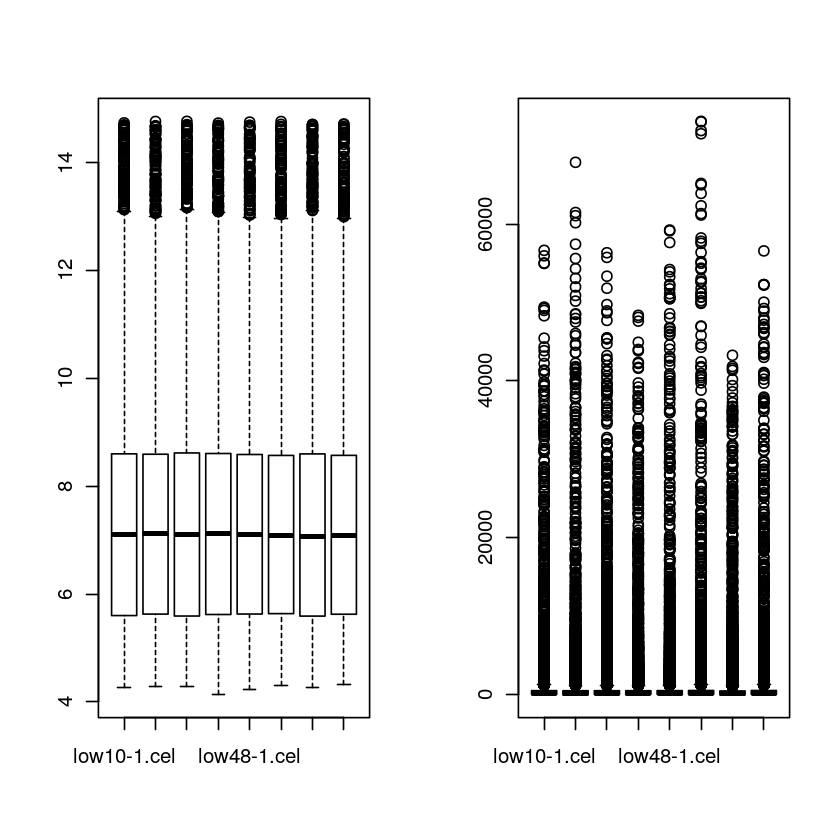

In [11]:
par(mfrow=c(1,2))
boxplot(e_rma)
boxplot(e_mas5)

In [12]:
log2e_mas5<-log2(e_mas5)
head(log2e_mas5)

low10-1.cel low10-2.cel high10-1.cel high10-2.cel low48-1.cel
100_g_at   9.788205   10.242990    9.476811     9.337098     9.502125  
1000_at   11.638140   11.411812   11.016942    11.050395    11.244149  
1001_at    5.311349    4.184892    3.990683     5.736020     7.284822  
1002_f_at  4.463242    5.293238    3.790111     4.355780     4.957185  
1003_s_at  5.857851    5.927071    7.536055     7.598605     5.571639  
1004_at    7.253403    7.353543    7.408124     7.333103     7.979572  
          low48-2.cel high48-1.cel high48-2.cel
100_g_at  10.100809    9.803606     9.911849   
1000_at   11.242560   11.168788    11.228192   
1001_at    6.716609    4.491990     7.053924   
1002_f_at  5.361507    5.036979     6.492538   
1003_s_at  8.180022    7.325552     8.098230   
1004_at    7.257895    7.612870     8.014266

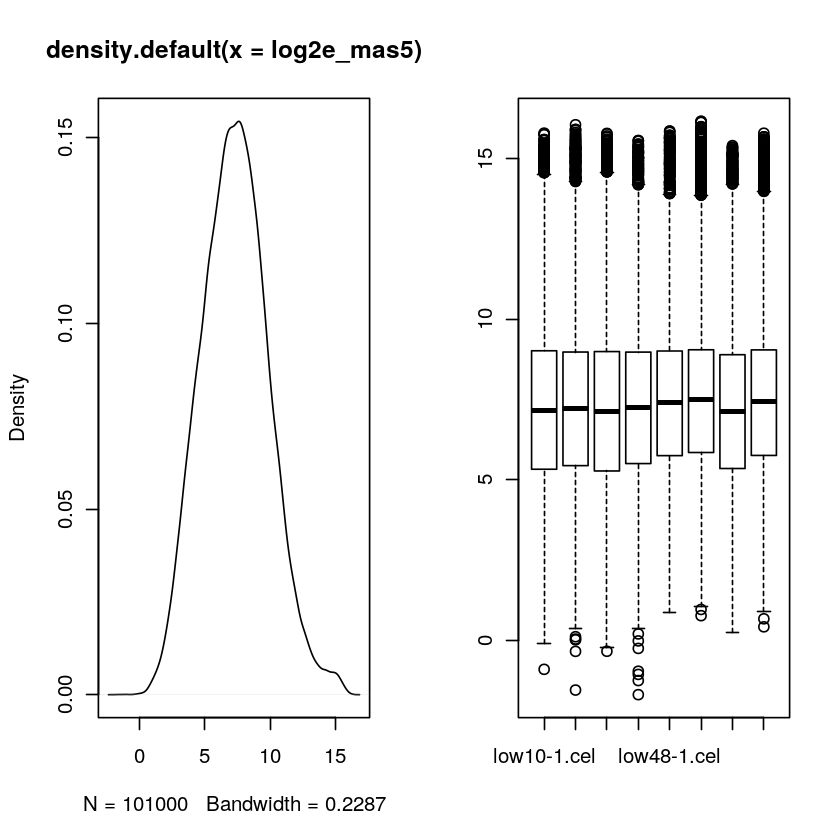

In [13]:
par(mfrow=c(1,2))
log2d<-density(log2e_mas5)
plot(log2d)
boxplot(log2e_mas5)

In [14]:
setwd("~/Autumn2016/Week5/data_wk_5")

In [15]:
load("eset_puma.RDA")
ls()

[1] "affybatch.estrogen" "d1"                 "d2"                
 [4] "e_mas5"             "e_rma"              "eset_estrogen_puma"
 [7] "eset_mas5"          "eset_rma"           "log2d"             
[10] "log2e_mas5"

In [16]:
head(eset_estrogen_puma)

Loading required package: puma
Loading required package: oligo
Loading required package: oligoClasses
Welcome to oligoClasses version 1.32.0

Attaching package: ‘oligoClasses’

The following object is masked from ‘package:affy’:

    list.celfiles

Loading required package: Biostrings
Loading required package: S4Vectors
Loading required package: stats4
Loading required package: IRanges
Loading required package: XVector
Welcome to oligo version 1.34.2

Attaching package: ‘oligo’

The following objects are masked from ‘package:affy’:

    intensity, MAplot, mm, mm<-, mmindex, pm, pm<-, pmindex,
    probeNames, rma

Loading required package: mclust
Package 'mclust' version 5.2
Type 'citation("mclust")' for citing this R package in publications.


Expression Set (exprReslt) with 
	1 genes
	8 samples
	An object of class 'AnnotatedDataFrame'
  sampleNames: low10-1.cel low10-2.cel ... high48-2.cel (8 total)
  varLabels: estrogen time.h
  varMetadata: labelDescription

In [17]:
e_mmgmos<-exprs(eset_estrogen_puma)
head(e_mmgmos)


low10-1.cel low10-2.cel high10-1.cel high10-2.cel low48-1.cel
100_g_at   4.5636890   5.0542649   4.3147335    3.323781455  4.1293564 
1000_at    7.0441500   6.7470287   6.1633587    6.023999895  5.9510488 
1001_at   -1.5355806  -1.4367264  -1.9746399   -0.097707515  1.1476384 
1002_f_at -1.4571550  -0.9999348  -1.9062753   -1.185054088 -2.2071496 
1003_s_at -2.0247799  -0.5052158  -0.1332393    0.889561658  0.6175251 
1004_at    0.0781212   0.1790070  -0.3844425   -0.006124629  1.9511443 
          low48-2.cel high48-1.cel high48-2.cel
100_g_at   4.5447948   4.039069     4.1924974  
1000_at    5.9870338   5.940411     5.6196507  
1001_at   -0.3794378  -2.924452     1.0317169  
1002_f_at -1.9164036  -1.300294    -1.9311610  
1003_s_at  2.0123121   1.550318     0.5264854  
1004_at    1.3045113   2.029137     2.5490697

In [19]:
log2e_mmgmos<-log2(e_mmgmos)
head(log2e_mmgmos)

Warning message in eval(expr, envir, enclos):
“NaNs produced”

low10-1.cel low10-2.cel high10-1.cel high10-2.cel low48-1.cel
100_g_at   2.190200    2.337501   2.109271      1.7328255    2.0459169 
1000_at    2.816426    2.754252   2.623717      2.5907217    2.5731439 
1001_at         NaN         NaN        NaN            NaN    0.1986681 
1002_f_at       NaN         NaN        NaN            NaN          NaN 
1003_s_at       NaN         NaN        NaN     -0.1688335   -0.6954302 
1004_at   -3.678142   -2.481912        NaN            NaN    0.9643205 
          low48-2.cel high48-1.cel high48-2.cel
100_g_at  2.1842152   2.0140228     2.06780989 
1000_at   2.5818414   2.5705628     2.49048046 
1001_at         NaN         NaN     0.04504714 
1002_f_at       NaN         NaN            NaN 
1003_s_at 1.0088541   0.6325642    -0.92553469 
1004_at   0.3835094   1.0208664     1.34997080

In [20]:
library(limma)


Attaching package: ‘limma’

The following object is masked from ‘package:oligo’:

    backgroundCorrect

The following object is masked from ‘package:BiocGenerics’:

    plotMA



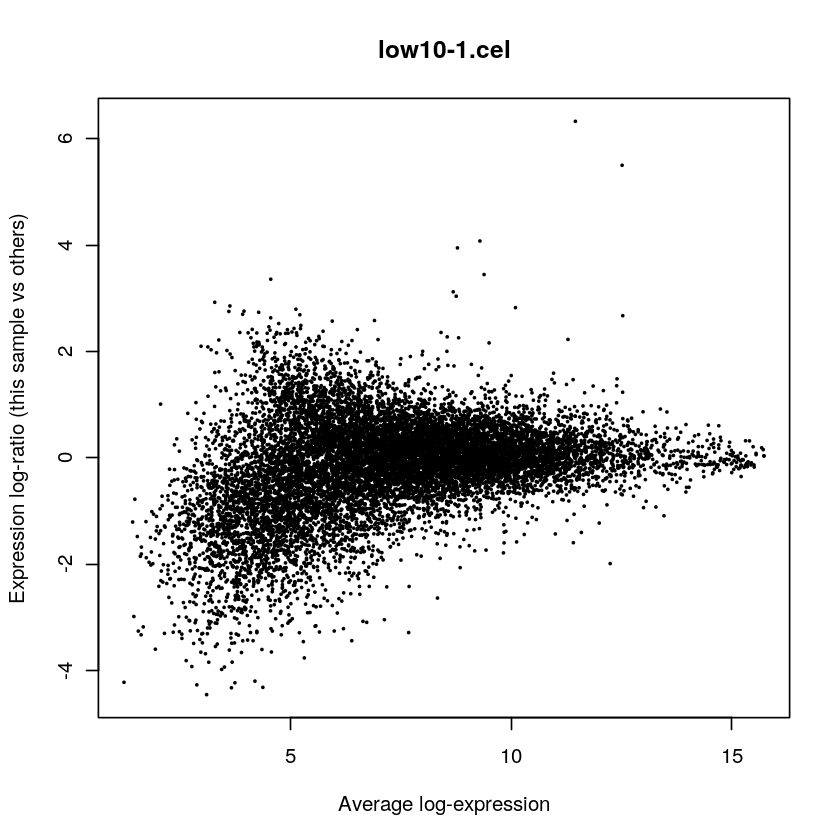

In [21]:
limma::plotMA(log2e_mas5)

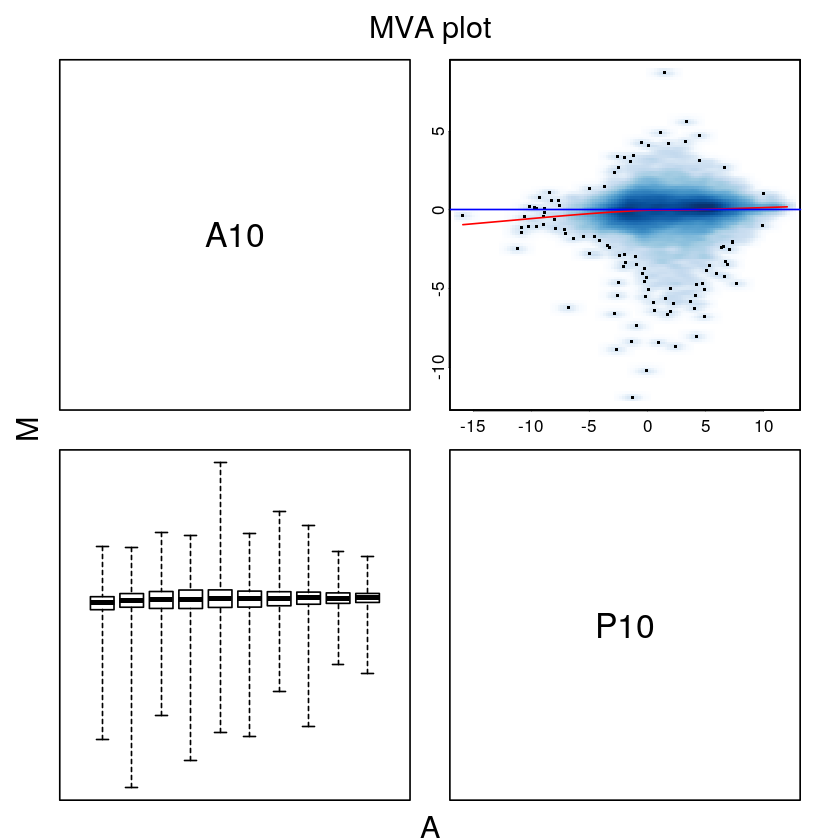

In [22]:
groups<-c("A10","A10","P10","P10","A48","A48","P48","P48")
table_estrogen<-data.frame(sampleNames(eset_estrogen_puma),groups)
group10hr<-factor(groups[1:4])

MAplot(eset_estrogen_puma[,1:4], pairs=TRUE, groups=group10hr)

In [24]:
load("eset_puma_comb.RDA")
ls()

[1] "affybatch.estrogen" "d1"                 "d2"                
 [4] "e_mas5"             "e_mmgmos"           "e_rma"             
 [7] "eset_estrogen_comb" "eset_estrogen_puma" "eset_mas5"         
[10] "eset_rma"           "group10hr"          "groups"            
[13] "log2d"              "log2e_mas5"         "log2e_mmgmos"      
[16] "table_estrogen"